# REFINITIV PEERS WACC COMPARISON

### Instructions

Please input a valid RIC after running the first and second cell below. Then you can run the rest of the notebook using shift+enter for each cell sequentially. 

This notebook will provide all of the information contained in the popular Eikon/Workspace template of the same name. This includes a breakdown of different WACC measures for peers of the RIC entered. We also offer Market Cap Weighted Average WACC measure for the peer group. Finally we provide a chart of the history of WACC for all peers to enable you to see trends over time - you can select how far and for what intervals you wish to request.

In [2]:
import refinitiv.data as rd
from refinitiv.data.discovery import Peers
import numpy as np
import pandas as pd
import ipywidgets as widgets
from ipywidgets import Box, Layout
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
plt.style.use("seaborn")
warnings.filterwarnings("ignore")
rd.open_session()

<refinitiv.data.session.Definition object at 0x16b9fc280 {name='workspace'}>

In [3]:
ric = widgets.Text(
    value='',
    placeholder='Type something',
    description='RIC:',
    disabled=False
)

box_layout = Layout(display='flex',
                    flex_flow='row wrap',
                    align_items='stretch',
                    border='solid',
                    width='100%')

items = [ric]
box = Box(children=items,layout=box_layout)

box

Box(children=(Text(value='', description='RIC:', placeholder='Type something'),), layout=Layout(align_items='s…

### Peers - WACC Details

In [4]:
peers = Peers(ric.value)
df = rd.get_data([ric.value, *peers],['TR.RIC','TR.CommonName',
                                                       'TR.HQCountryCode','TR.WACC','TR.WACCERP',
                                                       'TR.WACCDebtWeight','TR.WACCEquityWeight',
                                                       'TR.WACCBeta','TR.WACCCompanyTaxRateMedian'])
df

,Instrument,RIC,Company Common Name,Country ISO Code of Headquarters,"Weighted Average Cost of Capital, (%)","WACC Equity Risk Premium, (%)","WACC Debt Weight, (%)","WACC Equity Weight, (%)",Beta,"WACC Company Tax Rate Median, (%)"
0,VOD.L,VOD.L,Vodafone Group PLC,GB,6.619253,7.139906,70.327442,29.672558,0.942714,60.7275
1,BT.L,BT.L,BT Group PLC,GB,7.027794,7.139906,66.460893,33.539107,1.047515,22.32416
2,TEF.MC,TEF.MC,Telefonica SA,ES,5.000441,5.82773,69.976095,30.023905,0.951175,24.23539
3,ORAN.PA,ORAN.PA,Orange SA,FR,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,DTEGn.DE,DTEGn.DE,Deutsche Telekom AG,DE,6.098048,6.393554,61.543976,38.456024,0.700181,22.70582
5,CLNX.MC,CLNX.MC,Cellnex Telecom SA,ES,4.931963,5.82773,47.16724,52.83276,0.282494,<NA>
6,SCMN.S,SCMN.S,Swisscom AG,CH,4.438835,5.025365,21.641723,78.358277,0.431071,15.06392
7,LBTYA.OQ,LBTYA.OQ,Liberty Global PLC,GB,8.230978,7.139906,60.886562,39.113438,1.262181,22.39152
8,KPN.AS,KPN.AS,Koninklijke KPN NV,NL,4.654942,5.348864,35.026458,64.973542,0.317255,21.14321
9,TLIT.MI,TLIT.MI,Telecom Italia SpA,IT,6.173185,8.491434,89.146474,10.853526,1.151028,27.57456


### Peer Group - Mkt Cap Weighted WACC 

In [5]:
df1 = rd.get_data(peers,["GRWAVG(TR.CompanyMarketCap,TR.WACC,universe=""univ"")",
                                              "GRWAVG(TR.CompanyMarketCap,TR.WACCERP,universe=""univ"")",
                                              "GRWAVG(TR.CompanyMarketCap,TR.WACCDebtWeight,universe=""univ"")",
                                              "GRWAVG(TR.CompanyMarketCap,TR.WACCEquityWeight,universe=""univ"")",
                                              "GRWAVG(TR.CompanyMarketCap,TR.WACCBeta,universe=""univ"")",
                                              "GRWAVG(TR.CompanyMarketCap,TR.WACCCompanyTaxRateMedian,universe=""univ"")"])

df1.columns =['RIC','Group WACC','Group WACCERP','Group WACC Debt Weight','Group WACC Equity Weight','Group WACC Beta','Group WACC Company Median Tax Rate']
df1.transpose()

,0
RIC,n/a
Group WACC,6.325853
Group WACCERP,5.388778
Group WACC Debt Weight,39.627402
Group WACC Equity Weight,60.372549
Group WACC Beta,0.660048
Group WACC Company Median Tax Rate,25.304738


### Peers - WACC History Chart

In [6]:
sD = widgets.Text(
    value='0',
    placeholder='Type something',
    description='Start:',
    disabled=False
)

eD = widgets.Text(
    value='-30',
    placeholder='Type something',
    description='End:',
    disabled=False
)

fSel = widgets.Dropdown(
    options=[('Daily','D'),('Weekly','W'),('Monthly','M'),('Quarterly','Q'),('Yearly','Y')],
    value='M',
    description='Freq',
    disabled=False
)

box_layout = Layout(display='flex',
                    flex_flow='row wrap',
                    align_items='stretch',
                    border='solid',
                    width='100%')

items = [sD,eD,fSel]
box = Box(children=items,layout=box_layout)
box

Box(children=(Text(value='0', description='Start:', placeholder='Type something'), Text(value='-30', descripti…

In [7]:
df2 = rd.get_data([ric.value, *peers],
                      ['TR.WACC.calcdate','TR.WACC'],parameters={'SDate': str(sD.value), 'EDate': str(eD.value), 'Frq': fSel.value})
df2['Calc Date'] = pd.to_datetime(df2['Calc Date'])
df2.set_index('Calc Date',inplace=True)
df2

,Instrument,"Weighted Average Cost of Capital, (%)"
Calc Date,,
2023-02-28,VOD.L,6.658907
2023-01-31,VOD.L,6.612805
2022-12-31,VOD.L,6.919078
2022-11-30,VOD.L,6.874036
2022-10-31,VOD.L,8.197474
...,...,...
2020-12-31,VON.AS,3.371199
2020-11-30,VON.AS,3.365523
2020-10-31,VON.AS,3.768679


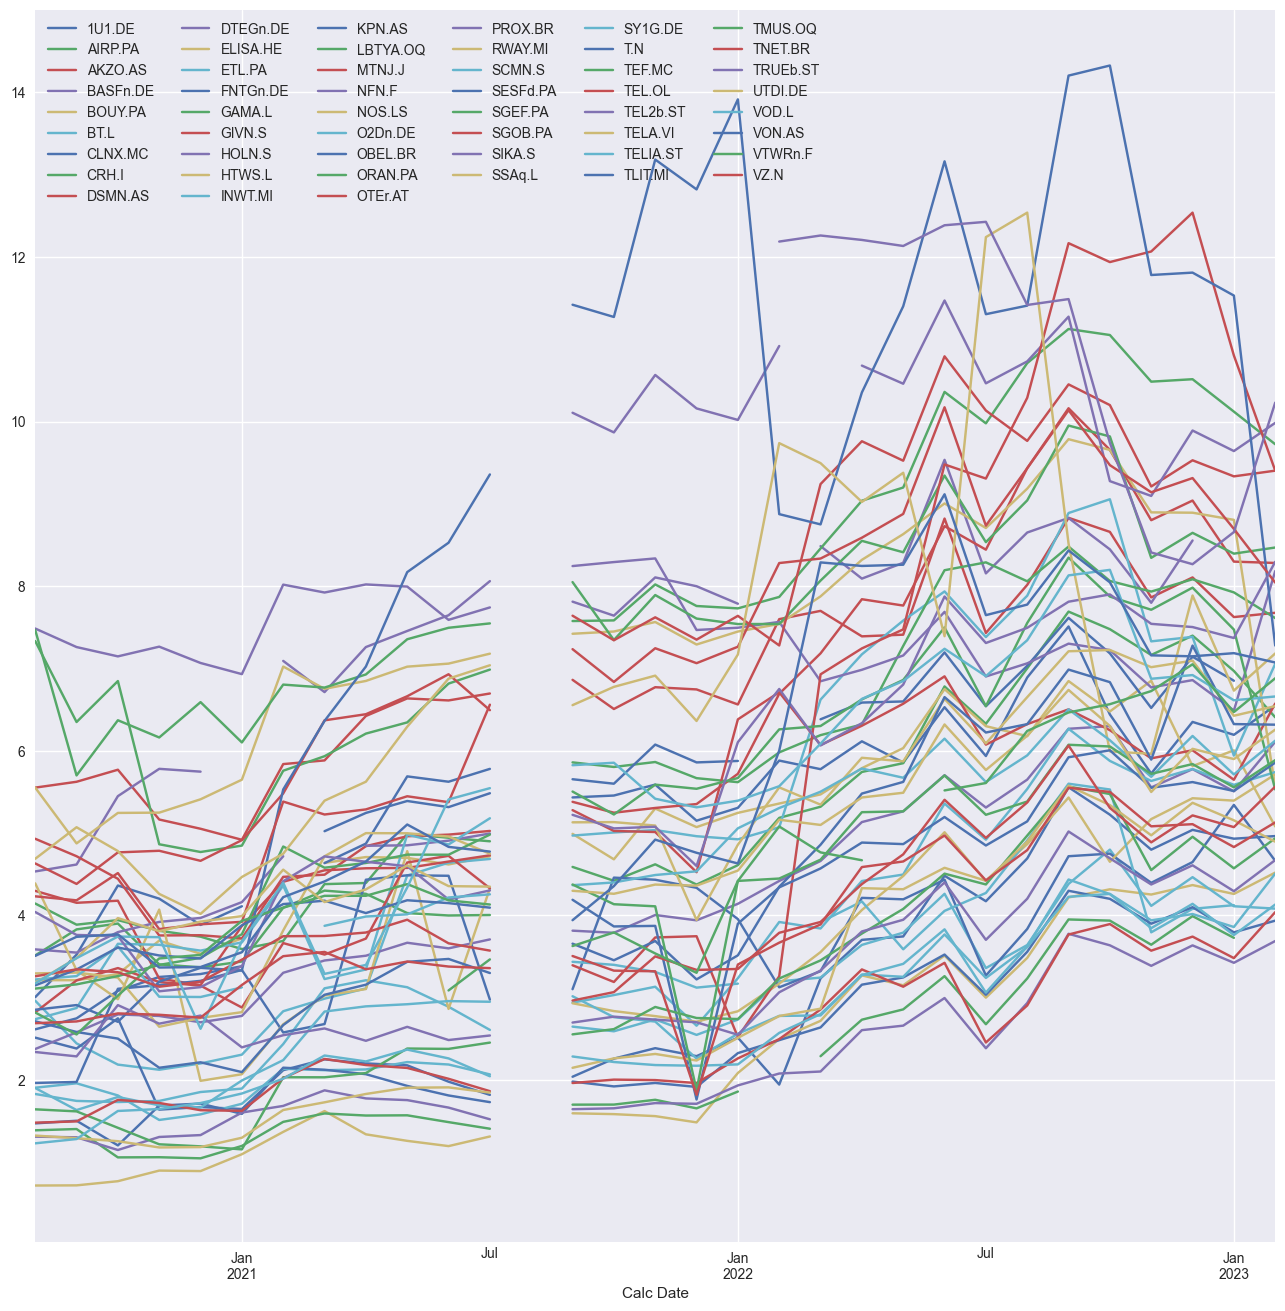

In [8]:
fig, ax = plt.subplots(figsize=(16,16))
line = df2.groupby('Instrument')['Weighted Average Cost of Capital, (%)'].plot(kind='line', legend=False)

ax.legend(loc='upper left', ncol=6)

In [9]:
rd.close_session()

**Further Resources for Refinitiv Data Libraries API on Developer Community Portal**

* [Overview](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python) 
* [Quick Start ](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/quick-start)
* [Documentation](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/documentation)
* [Tutorials](https://developers.refinitiv.com/en/api-catalog/refinitiv-data-platform/refinitiv-data-library-for-python/tutorials)
* [Q&A Forums](https://community.developers.refinitiv.com/spaces/321/index.html)